In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | banda aceh
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | horizonte
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | riacho de santana
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | saint-augustin
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | mugur-aksy
Processing Record 16 of Set 1 | waingapu
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | nantucket
Processing R

Processing Record 38 of Set 4 | vestmanna
Processing Record 39 of Set 4 | kurumkan
Processing Record 40 of Set 4 | lakes entrance
Processing Record 41 of Set 4 | natal
Processing Record 42 of Set 4 | coihaique
Processing Record 43 of Set 4 | itoman
Processing Record 44 of Set 4 | choya
Processing Record 45 of Set 4 | devils lake
Processing Record 46 of Set 4 | ekhabi
Processing Record 47 of Set 4 | darhan
Processing Record 48 of Set 4 | vardo
Processing Record 49 of Set 4 | emba
Processing Record 50 of Set 4 | sao felix do xingu
Processing Record 1 of Set 5 | honiara
Processing Record 2 of Set 5 | maralal
Processing Record 3 of Set 5 | anage
Processing Record 4 of Set 5 | lazaro cardenas
Processing Record 5 of Set 5 | kieta
Processing Record 6 of Set 5 | sitka
Processing Record 7 of Set 5 | sinnamary
Processing Record 8 of Set 5 | brigantine
Processing Record 9 of Set 5 | kahului
Processing Record 10 of Set 5 | colquechaca
Processing Record 11 of Set 5 | victor harbor
Processing Record

Processing Record 30 of Set 8 | zhangye
Processing Record 31 of Set 8 | yantal
Processing Record 32 of Set 8 | shchelyayur
City not found. Skipping...
Processing Record 33 of Set 8 | kavant
City not found. Skipping...
Processing Record 34 of Set 8 | bemidji
Processing Record 35 of Set 8 | taltal
Processing Record 36 of Set 8 | alto piquiri
Processing Record 37 of Set 8 | gondar
Processing Record 38 of Set 8 | orange cove
Processing Record 39 of Set 8 | zhigalovo
Processing Record 40 of Set 8 | okha
Processing Record 41 of Set 8 | henties bay
Processing Record 42 of Set 8 | tarko-sale
Processing Record 43 of Set 8 | verkhnetulomskiy
Processing Record 44 of Set 8 | paragominas
Processing Record 45 of Set 8 | ambilobe
Processing Record 46 of Set 8 | salvador
Processing Record 47 of Set 8 | okhotsk
Processing Record 48 of Set 8 | beringovskiy
Processing Record 49 of Set 8 | krasnodon
Processing Record 50 of Set 8 | severo-kurilsk
Processing Record 1 of Set 9 | mbandaka
Processing Record 2 

Processing Record 18 of Set 12 | effingham
Processing Record 19 of Set 12 | goderich
Processing Record 20 of Set 12 | kaeo
Processing Record 21 of Set 12 | winneba
Processing Record 22 of Set 12 | jutai
Processing Record 23 of Set 12 | teguldet
Processing Record 24 of Set 12 | americus
Processing Record 25 of Set 12 | tambovka
Processing Record 26 of Set 12 | mahanoro
Processing Record 27 of Set 12 | mae ramat
Processing Record 28 of Set 12 | uroteppa
City not found. Skipping...
Processing Record 29 of Set 12 | kabo
Processing Record 30 of Set 12 | tanout
Processing Record 31 of Set 12 | muisne
Processing Record 32 of Set 12 | clonakilty
Processing Record 33 of Set 12 | manggar
Processing Record 34 of Set 12 | kholtoson
Processing Record 35 of Set 12 | tessalit
Processing Record 36 of Set 12 | awjilah
Processing Record 37 of Set 12 | iralaya
Processing Record 38 of Set 12 | potiskum
Processing Record 39 of Set 12 | bang saphan
Processing Record 40 of Set 12 | napier
Processing Record 4

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,37.06,87,40,25.32,AR,2022-04-06 00:26:35
1,Hermanus,-34.4187,19.2345,61.81,80,10,15.86,ZA,2022-04-06 00:26:36
2,Banda Aceh,5.5577,95.3222,77.83,84,100,8.84,ID,2022-04-06 00:26:36
3,Busselton,-33.6500,115.3333,58.82,70,49,9.10,AU,2022-04-06 00:26:36
4,Albany,42.6001,-73.9662,54.25,53,97,1.01,US,2022-04-06 00:26:37
5,Dikson,73.5069,80.5464,-0.36,81,70,18.07,RU,2022-04-06 00:26:37
6,Horizonte,-4.1000,-38.4833,80.01,88,56,2.15,BR,2022-04-06 00:26:37
7,Riacho De Santana,-13.6092,-42.9389,75.06,54,16,5.53,BR,2022-04-06 00:26:38
8,Rikitea,-23.1203,-134.9692,79.27,67,57,16.67,PF,2022-04-06 00:26:38
9,Saint-Augustin,51.2260,-58.6502,32.94,85,100,11.86,CA,2022-04-06 00:26:38


In [15]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-06 00:26:35,-54.8000,-68.3000,37.06,87,40,25.32
1,Hermanus,ZA,2022-04-06 00:26:36,-34.4187,19.2345,61.81,80,10,15.86
2,Banda Aceh,ID,2022-04-06 00:26:36,5.5577,95.3222,77.83,84,100,8.84
3,Busselton,AU,2022-04-06 00:26:36,-33.6500,115.3333,58.82,70,49,9.10
4,Albany,US,2022-04-06 00:26:37,42.6001,-73.9662,54.25,53,97,1.01
5,Dikson,RU,2022-04-06 00:26:37,73.5069,80.5464,-0.36,81,70,18.07
6,Horizonte,BR,2022-04-06 00:26:37,-4.1000,-38.4833,80.01,88,56,2.15
7,Riacho De Santana,BR,2022-04-06 00:26:38,-13.6092,-42.9389,75.06,54,16,5.53
8,Rikitea,PF,2022-04-06 00:26:38,-23.1203,-134.9692,79.27,67,57,16.67
9,Saint-Augustin,CA,2022-04-06 00:26:38,51.2260,-58.6502,32.94,85,100,11.86


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

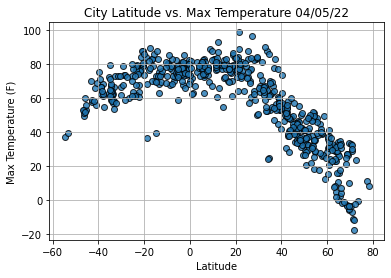

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

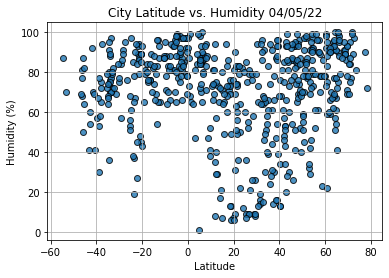

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()